Activitie 0 / Filipe Moreno / 18/02/2025
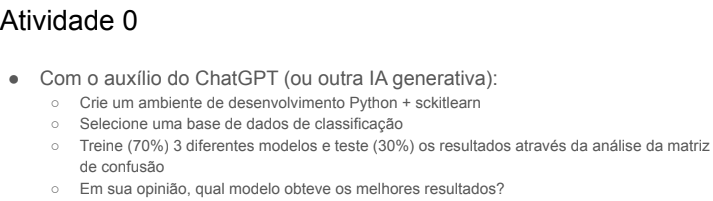




# Imports

Data Manipulation

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Models

In [2]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Metrics

In [3]:
# Metrics
from sklearn.metrics import classification_report, confusion_matrix

Data Visualization

In [4]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

Model Saving

In [5]:
# Model Saving
import joblib

# Setting up

In [6]:
# Forcing random to 42
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

In [7]:
# Carregar o dataset Iris do scikit-learn
iris = load_iris()
# Criar um DataFrame com os dados e nomear as colunas
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
# Adicionar a coluna target (classe)
df['target'] = iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# Exibir um resumo estatístico dos dados
print("Resumo estatístico:")
print(df.describe())

Resumo estatístico:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [11]:
# Verificar se há dados faltantes
print("\nDados faltantes:")
print(df.isnull().sum())


Dados faltantes:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [12]:
# Separar as variáveis independentes (features) e a variável dependente (target)
X = df[iris.feature_names]
y = df['target']

In [37]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Separating Train and Test

In [13]:
# Dividir os dados em conjuntos de treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalization

In [14]:
# Escalar os dados para melhorar o desempenho do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Preparing Models

In [15]:
# Preparing the Model
model_lr = LogisticRegression(max_iter=200, random_state=random_state)
model_knn = KNeighborsClassifier()  # O KNN não utiliza random_state
model_tree = DecisionTreeClassifier(random_state=random_state)

In [16]:
# Trainning the Model
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [17]:
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Testing Models

In [19]:
# Testing
models = {
    'Regressão Logística': (model_lr, X_test_scaled),
    'K-Nearest Neighbors': (model_knn, X_test_scaled),
    'Decision Tree': (model_tree, X_test)
}

# Plot with the confusion Matriz

In [30]:
def evaluate_model(model, X_test_used, y_test):
    """
    Avalia um modelo de classificação, imprimindo as métricas e plotando a matriz de confusão.

    Parâmetros:
    - model: Modelo treinado (por exemplo, modelo_knn)
    - X_test_used: Conjunto de teste utilizado pelo modelo (por exemplo, casos_de_test)
    - y_test: Vetor com os rótulos reais
    """
    # Obter as previsões do modelo
    y_pred = model.predict(X_test_used)

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Exibir os resultados no console
    print("Matriz de Confusão:")
    print(cm)
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Parâmetros do modelo:")
    print(model.get_params())

    # Plotar a matriz de confusão com Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Rótulos Preditos")
    plt.ylabel("Rótulos Verdadeiros")
    plt.title("Matriz de Confusão")
    plt.show()


## KNN

Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Parâmetros do modelo:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


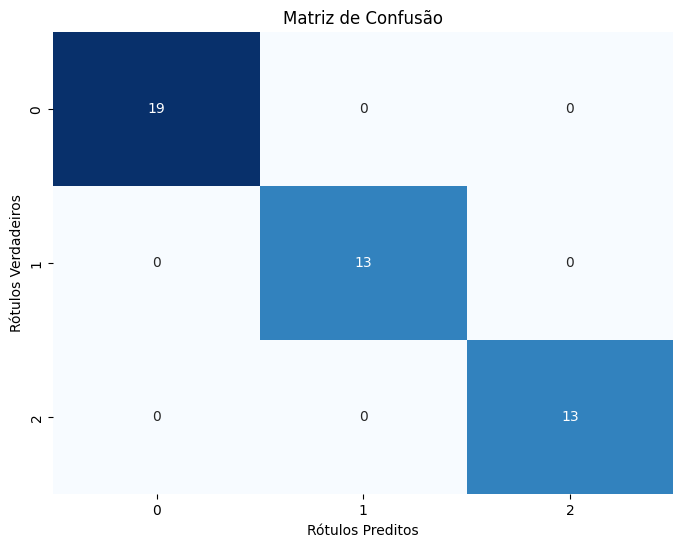

In [33]:
evaluate_model(model_knn, X_test_scaled, y_test)

## Decision Tree

Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Parâmetros do modelo:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


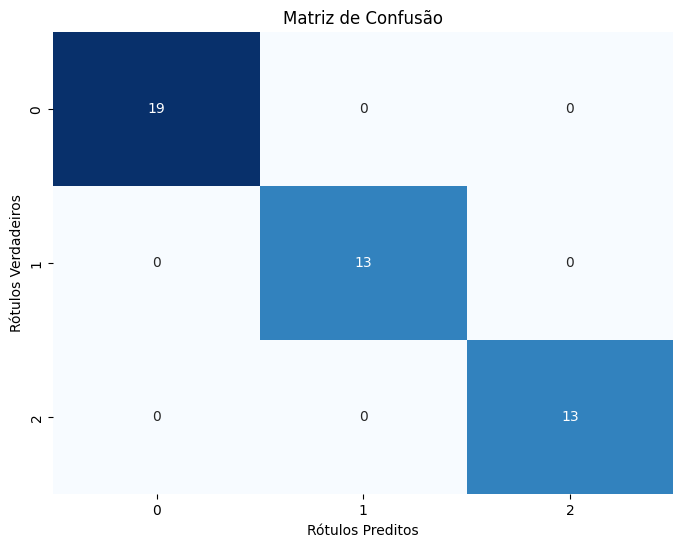

In [39]:
evaluate_model(model_tree, X_test, y_test)

## Regressão Logistica

Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Parâmetros do modelo:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 200, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


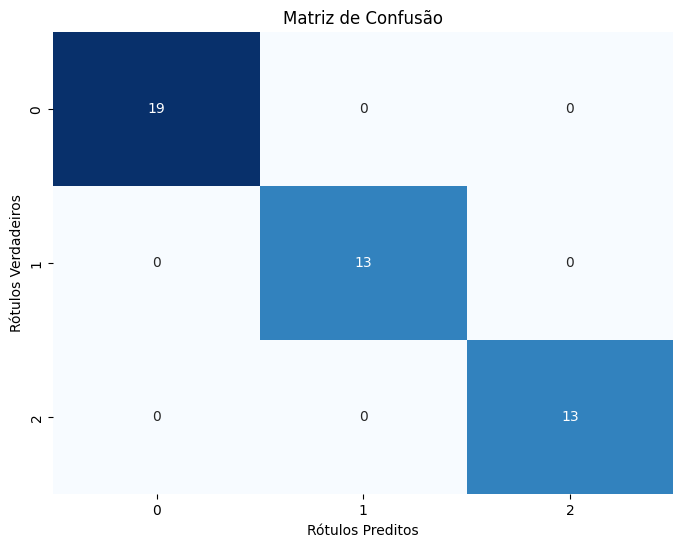

In [35]:
evaluate_model(model_lr, X_test_scaled, y_test)

## Comparativo dos Modelos

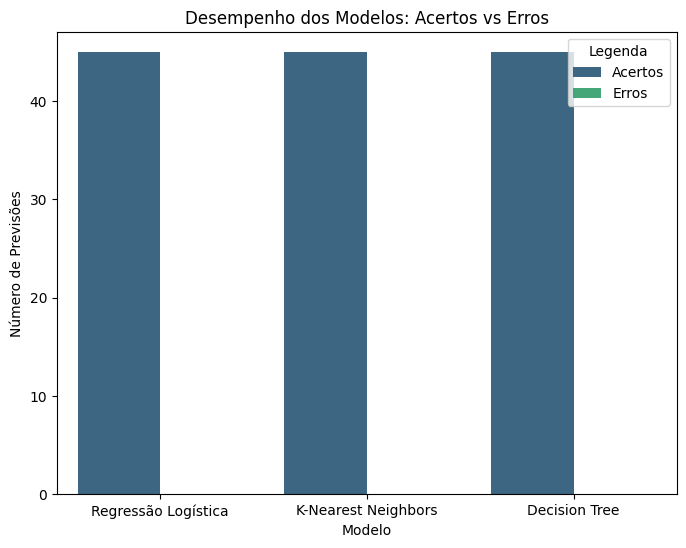

In [42]:
# Preparar uma lista para armazenar os resultados de cada modelo
resultados = []

# Itera sobre os modelos para calcular acertos e erros
for nome, (modelo, X_test_used) in models.items():
    y_pred = modelo.predict(X_test_used)
    acertos = (y_pred == y_test).sum()
    erros = len(y_test) - acertos
    resultados.append({'Modelo': nome, 'Acertos': acertos, 'Erros': erros})

# Converter os resultados em um DataFrame
df_resultados = pd.DataFrame(resultados)

# Reestruturar o DataFrame para plotagem (formato long)
df_plot = df_resultados.melt(id_vars='Modelo', value_vars=['Acertos', 'Erros'],
                             var_name='Tipo', value_name='Quantidade')

# Plotar o gráfico agrupado
plt.figure(figsize=(8, 6))
sns.barplot(data=df_plot, x='Modelo', y='Quantidade', hue='Tipo', palette='viridis')
plt.title('Desempenho dos Modelos: Acertos vs Erros')
plt.xlabel('Modelo')
plt.ylabel('Número de Previsões')
plt.ylim(0, len(y_test) + 2)
plt.legend(title='Legenda')
plt.show()


# User testing

In [40]:
def predict_iris_input(model):
    """
    Lê valores de input do usuário (Google Colab) para as 4 features do Iris
    e realiza a predição com o modelo fornecido.
    """
    print("Digite as medidas da flor Iris:")

    # Ler inputs
    sepal_length = float(input("Sepal length (cm): "))
    sepal_width  = float(input("Sepal width (cm): "))
    petal_length = float(input("Petal length (cm): "))
    petal_width  = float(input("Petal width (cm): "))

    # Montar o array de features (1 amostra com 4 valores)
    X_new = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                         columns=iris.feature_names)

    # Realizar a predição
    prediction = model.predict(X_new)[0]

    # Converter o índice numérico para o nome da classe (setosa, versicolor, virginica)
    predicted_class = iris.target_names[prediction]

    print(f"\nA classe predita foi: {predicted_class}")
    return predicted_class


## KNN

In [41]:
predict_iris_input(model_tree)

Digite as medidas da flor Iris:
Sepal length (cm): 3
Sepal width (cm): 4
Petal length (cm): 2
Petal width (cm): 1

A classe predita foi: setosa


'setosa'

## Decission Tree

In [ ]:
predict_iris_input(model_knn)

## Regressão Logistica

In [ ]:
predict_iris_input(model_lr)

# Results

## Saving

In [22]:
# Saving Results
joblib.dump(model_knn, 'knn_model.pkl')
joblib.dump(model_tree, 'decision_tree_model.pkl')
joblib.dump(model_lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## Final Considerations

Todos obtiveram resultados semelhantes, no entanto, no quesito complexidade e custo, acredito que a regressão logistica tenha sido o melhor caso.
